In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import zipfile
import os
from tqdm.notebook import tqdm

print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

System Version: 3.12.6 (tags/v3.12.6:a4a2d2b, Sep  6 2024, 20:11:23) [MSC v.1940 64 bit (AMD64)]
PyTorch version 2.5.1+cpu
Torchvision version 0.20.1+cpu
Numpy version 2.0.2
Pandas version 2.2.3


In [3]:
class PlayingCardDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    @property
    def classes(self):
        return self.data.classes

In [4]:
zip_path = r"C:\Users\meretricis\Desktop\py projects\cards_dataset.zip"
extract_path = r"C:\Users\meretricis\Desktop\py projects\cards_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Plik ZIP rozpakowany do:", extract_path)

Plik ZIP rozpakowany do: C:\Users\meretricis\Desktop\py projects\cards_dataset


In [10]:
train_dir = r"C:\Users\meretricis\Desktop\py projects\cards_dataset\train"

dataset = ImageFolder(root=train_dir, transform=ToTensor())

data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

for images, labels in data_loader:
    print("Batch of images shape:", images.shape)
    print("Batch of labels:", labels)
    break

Batch of images shape: torch.Size([32, 3, 224, 224])
Batch of labels: tensor([48, 28, 33, 48, 32, 19, 19, 11, 29, 10,  7, 50, 23, 24,  6, 46, 48, 42,
        37, 49, 51, 50, 39, 39, 41, 30, 41, 35, 31,  7, 34, 15])


In [11]:
len(dataset)

7624

In [12]:
image, label = dataset[6000]
print(label)
image

41


tensor([[[0.9843, 0.9843, 0.9882,  ..., 0.9529, 0.9608, 0.9647],
         [0.9843, 0.9882, 0.9882,  ..., 0.9412, 0.9490, 0.9529],
         [0.9922, 0.9922, 0.9922,  ..., 0.9137, 0.9176, 0.9176],
         ...,
         [0.9922, 0.9922, 0.9882,  ..., 0.8667, 0.8627, 0.8627],
         [0.9882, 0.9882, 0.9882,  ..., 0.8667, 0.8667, 0.8627],
         [0.9843, 0.9843, 0.9882,  ..., 0.8667, 0.8627, 0.8627]],

        [[0.9843, 0.9843, 0.9882,  ..., 0.9529, 0.9608, 0.9647],
         [0.9843, 0.9882, 0.9882,  ..., 0.9412, 0.9490, 0.9529],
         [0.9922, 0.9922, 0.9922,  ..., 0.9176, 0.9216, 0.9216],
         ...,
         [0.9922, 0.9922, 0.9882,  ..., 0.8706, 0.8667, 0.8667],
         [0.9882, 0.9882, 0.9882,  ..., 0.8706, 0.8706, 0.8667],
         [0.9843, 0.9843, 0.9882,  ..., 0.8706, 0.8667, 0.8667]],

        [[0.9843, 0.9843, 0.9882,  ..., 0.9451, 0.9529, 0.9569],
         [0.9843, 0.9882, 0.9882,  ..., 0.9333, 0.9412, 0.9451],
         [0.9922, 0.9922, 0.9922,  ..., 0.8980, 0.9020, 0.

In [14]:
data_dir = r'C:\Users\meretricis\Desktop\py projects\cards_dataset\train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [15]:
image, label = dataset[100]
image.shape

torch.Size([3, 224, 224])

In [16]:
for image, label in dataset:
    break

In [17]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [18]:
for images, labels in dataloader:
    break

In [19]:
images.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [20]:
labels

tensor([37, 45, 21, 29, 14, 16, 46, 27,  6,  9, 14,  2, 26,  9, 43, 26,  1, 47,
        35, 42, 37, 38, 11, 42, 41, 38, 16, 34,  5, 23,  5, 15])

In [21]:
class SimpleCardClassifer(nn.Module):
    def __init__(self, num_classes=53):
        super(SimpleCardClassifer, self).__init__()
        self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        output = self.classifier(x)
        return output

In [22]:
model = SimpleCardClassifer(num_classes=53)
print(str(model)[:500])

c:\Users\meretricis\Desktop\python\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\meretricis\.cache\huggingface\hub\models--timm--efficientnet_b0.ra_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


SimpleCardClassifer(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fal


In [23]:
example_out = model(images)
example_out.shape

torch.Size([32, 53])

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [25]:
criterion(example_out, labels)
print(example_out.shape, labels.shape)

torch.Size([32, 53]) torch.Size([32])


In [26]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_folder = r'C:\Users\meretricis\Desktop\py projects\cards_dataset\train'
valid_folder = r'C:\Users\meretricis\Desktop\py projects\cards_dataset\valid'
test_folder = r'C:\Users\meretricis\Desktop\py projects\cards_dataset\test'

train_dataset = PlayingCardDataset(train_folder, transform=transform)
val_dataset = PlayingCardDataset(valid_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [28]:
from tqdm import tqdm

for images, labels in tqdm(train_loader, desc='Training loop'):
    # Twoja pętla treningowa
    pass


Training loop: 100%|██████████| 239/239 [00:12<00:00, 18.68it/s]


In [29]:
num_epochs = 5
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SimpleCardClassifer(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc='Training loop'):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation loop'):
            images, labels = images.to(device), labels.to(device)
         
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")

Validation loop: 100%|██████████| 9/9 [00:04<00:00,  2.07it/s]


Epoch 1/5 - Train loss: 1.577803424873232, Validation loss: 0.36811007238783927


Validation loop: 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]


Epoch 2/5 - Train loss: 0.5598365240432283, Validation loss: 0.2420097788549819


Validation loop: 100%|██████████| 9/9 [00:03<00:00,  2.41it/s]


Epoch 3/5 - Train loss: 0.3502321396206759, Validation loss: 0.15116482899998718


Validation loop: 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]


Epoch 4/5 - Train loss: 0.25143959422489276, Validation loss: 0.14732744142694293


Validation loop: 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

Epoch 5/5 - Train loss: 0.18482789525455343, Validation loss: 0.1463223361462917


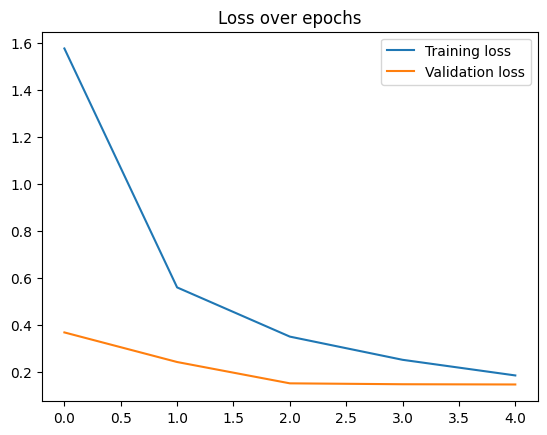

In [30]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

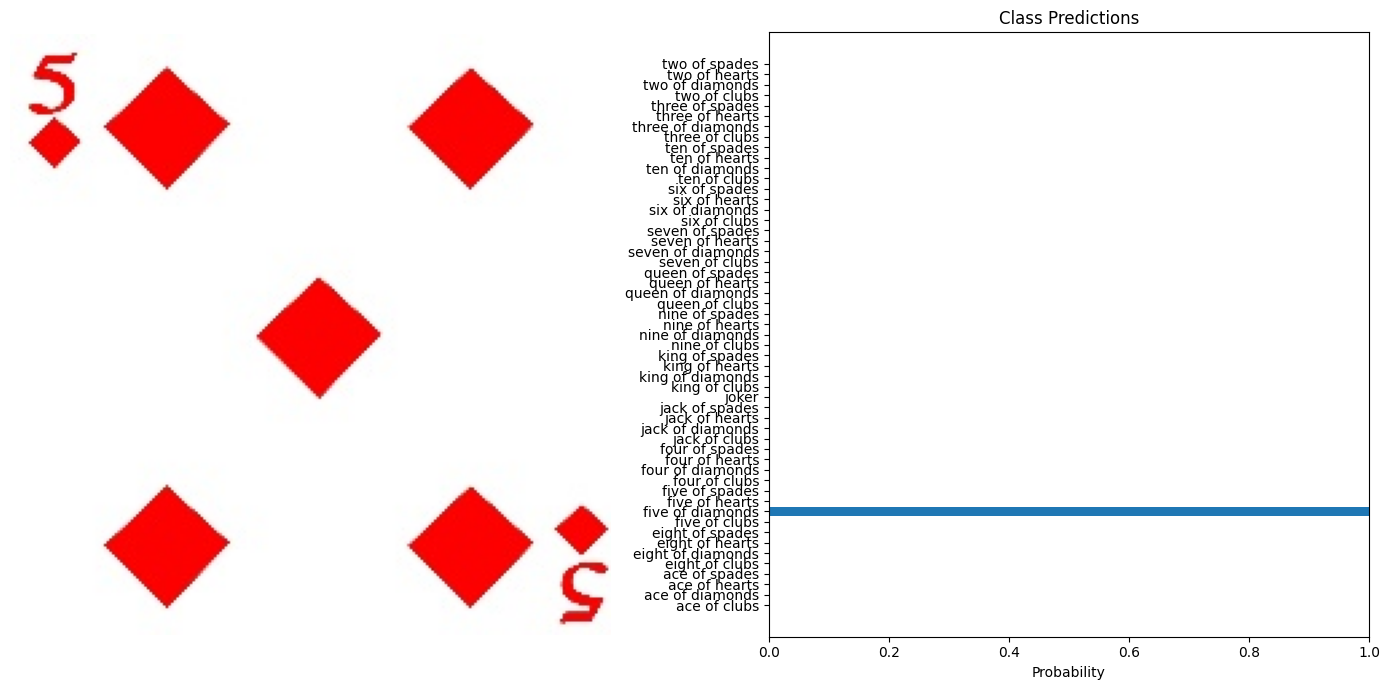

In [31]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

def visualize_predictions(original_image, probabilities, class_names):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))
   
    axarr[0].imshow(original_image)
    axarr[0].axis("off")
   
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

test_image = r'C:\Users\meretricis\Desktop\py projects\cards_dataset\test\five of diamonds\2.jpg'
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

class_names = dataset.classes 
visualize_predictions(original_image, probabilities, class_names)

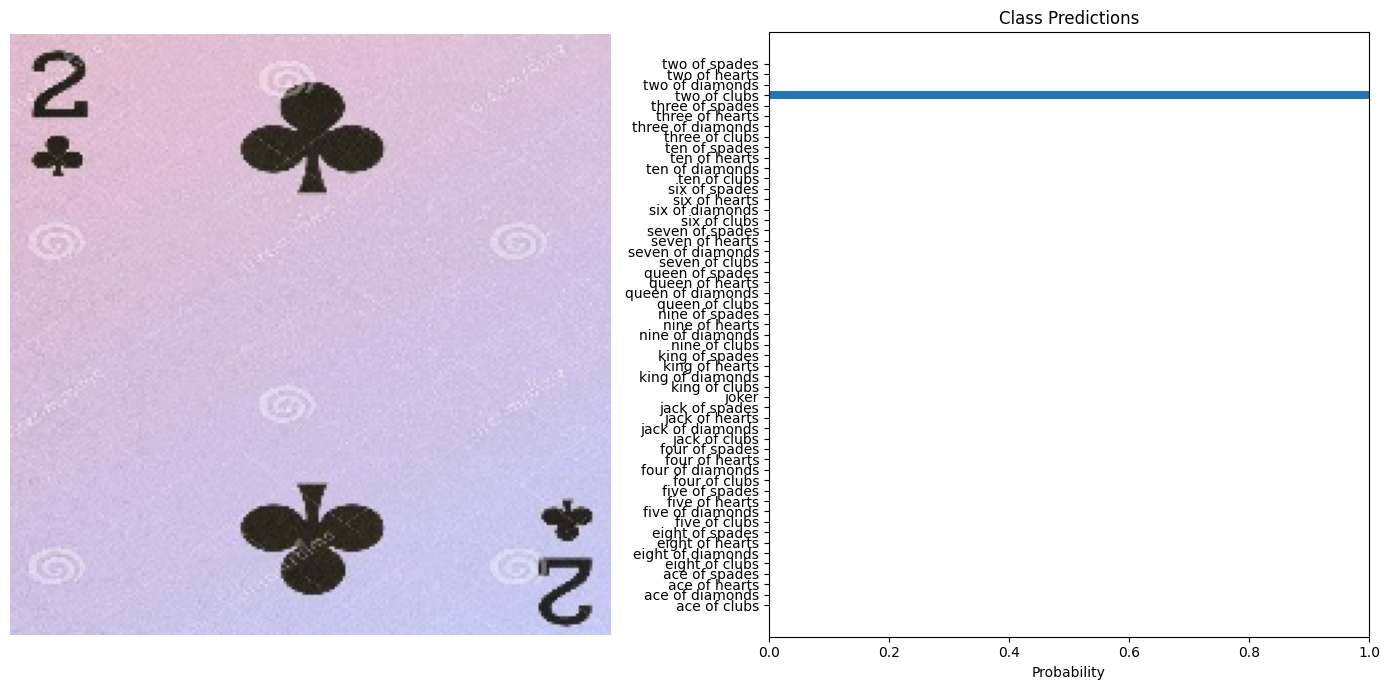

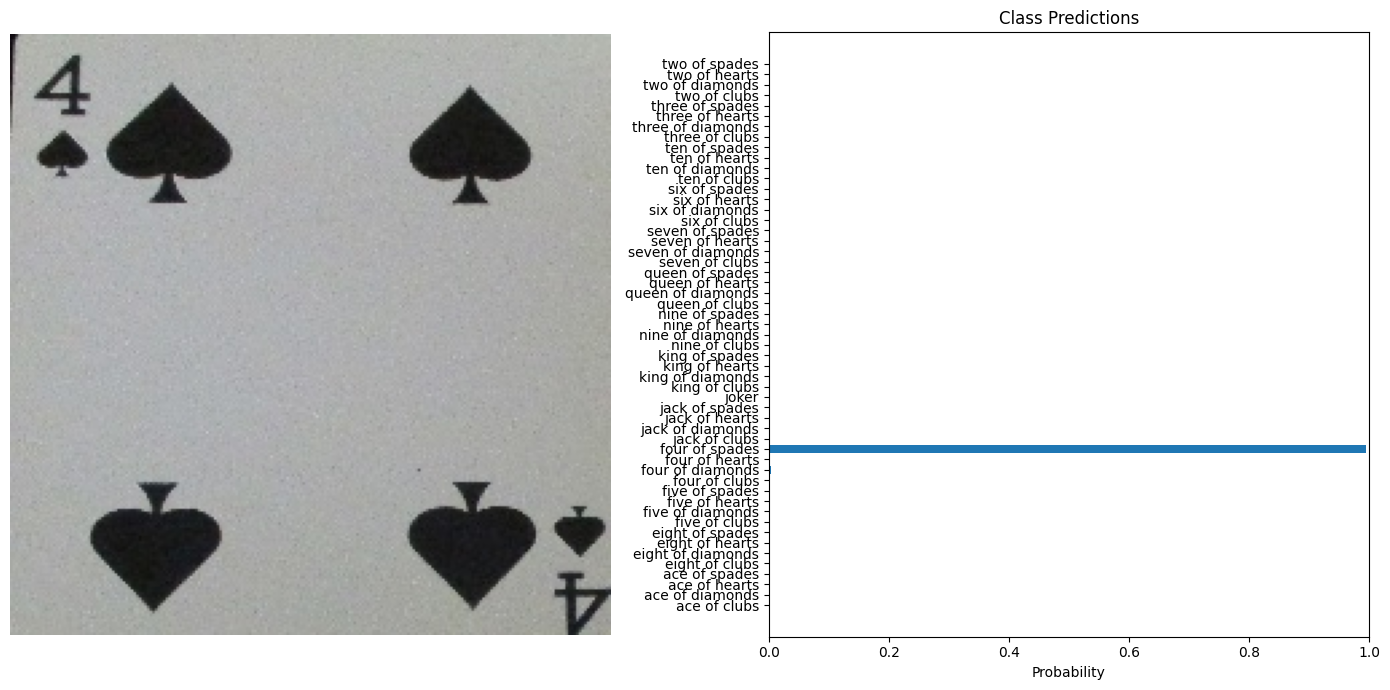

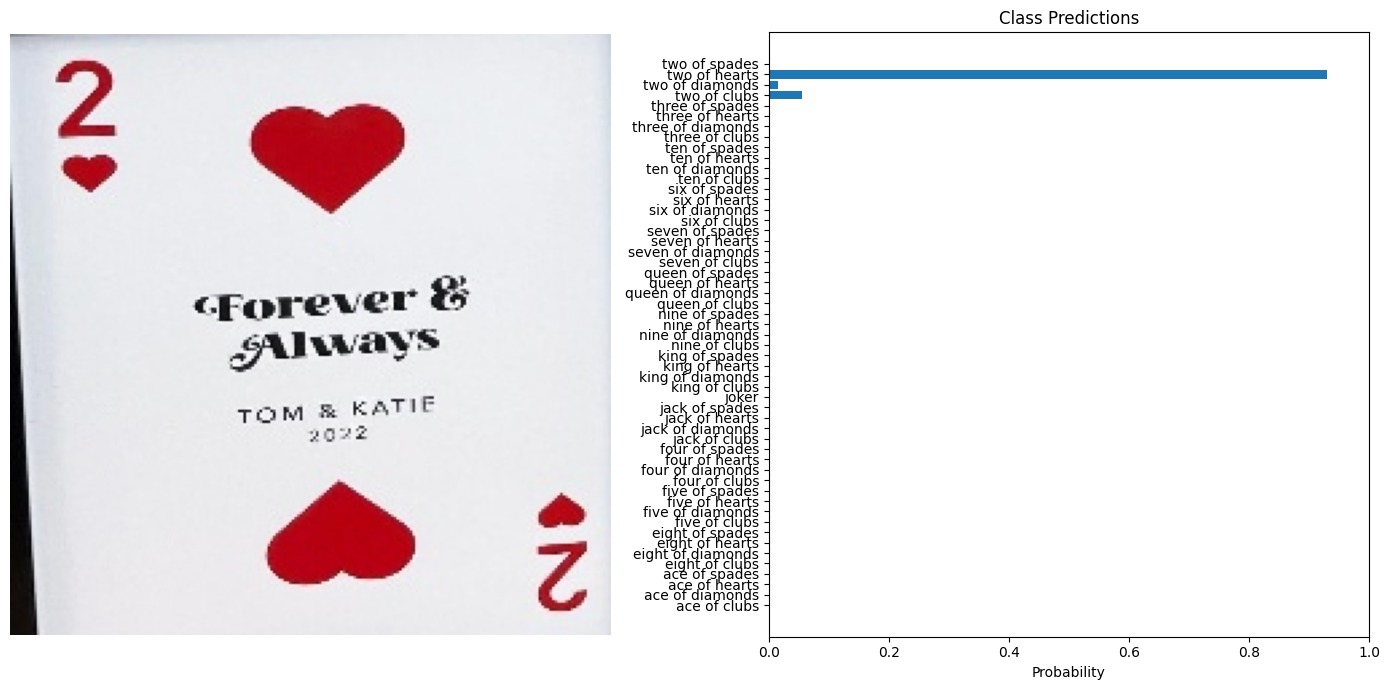

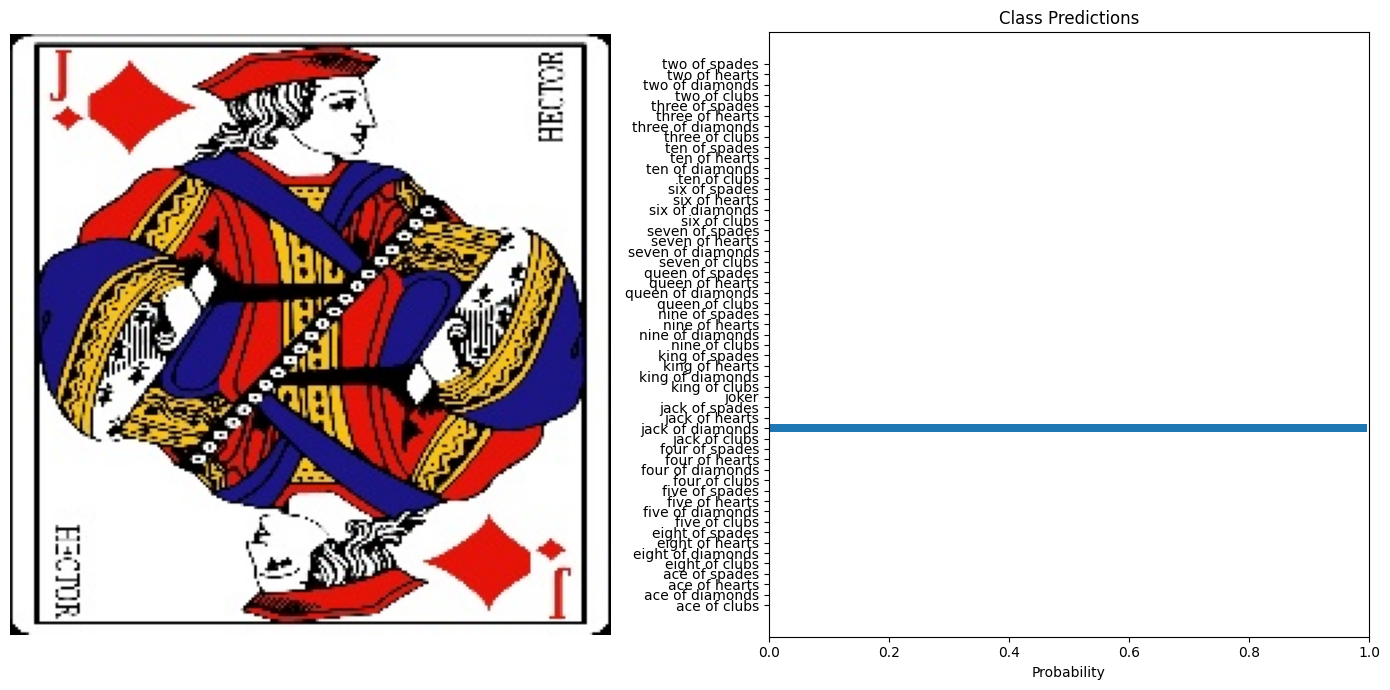

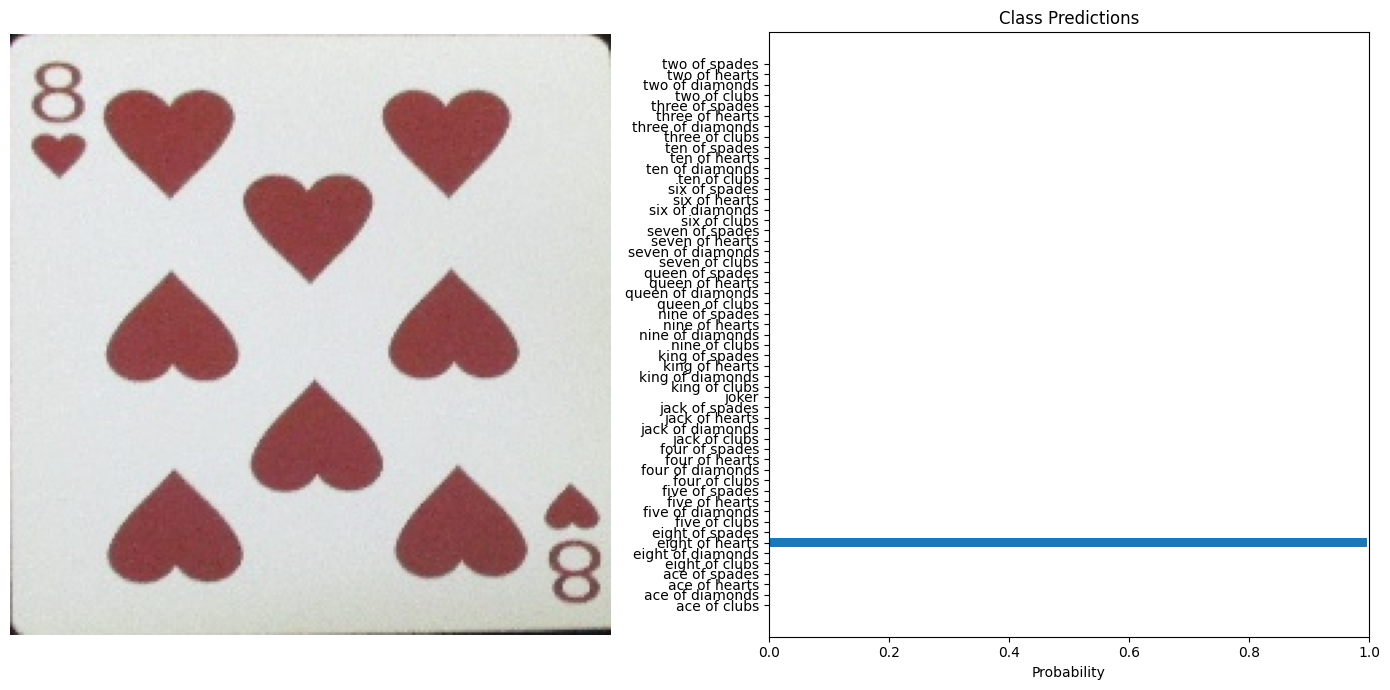

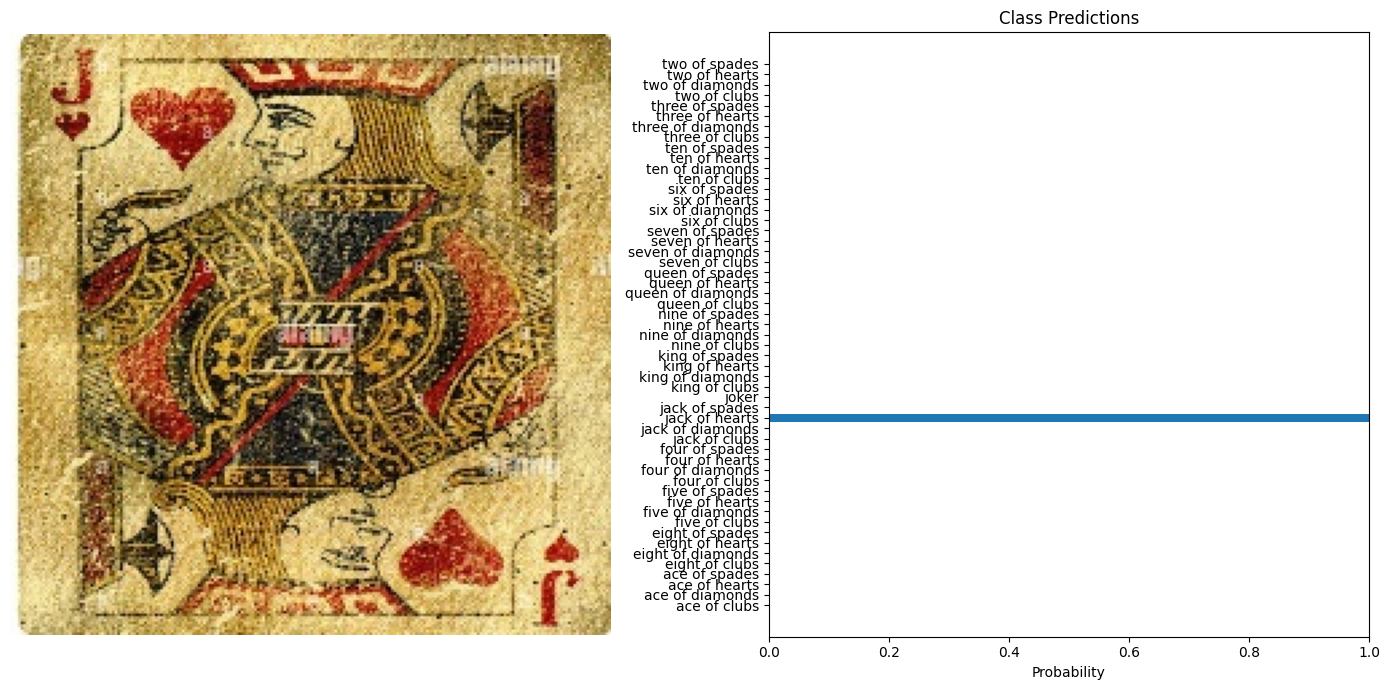

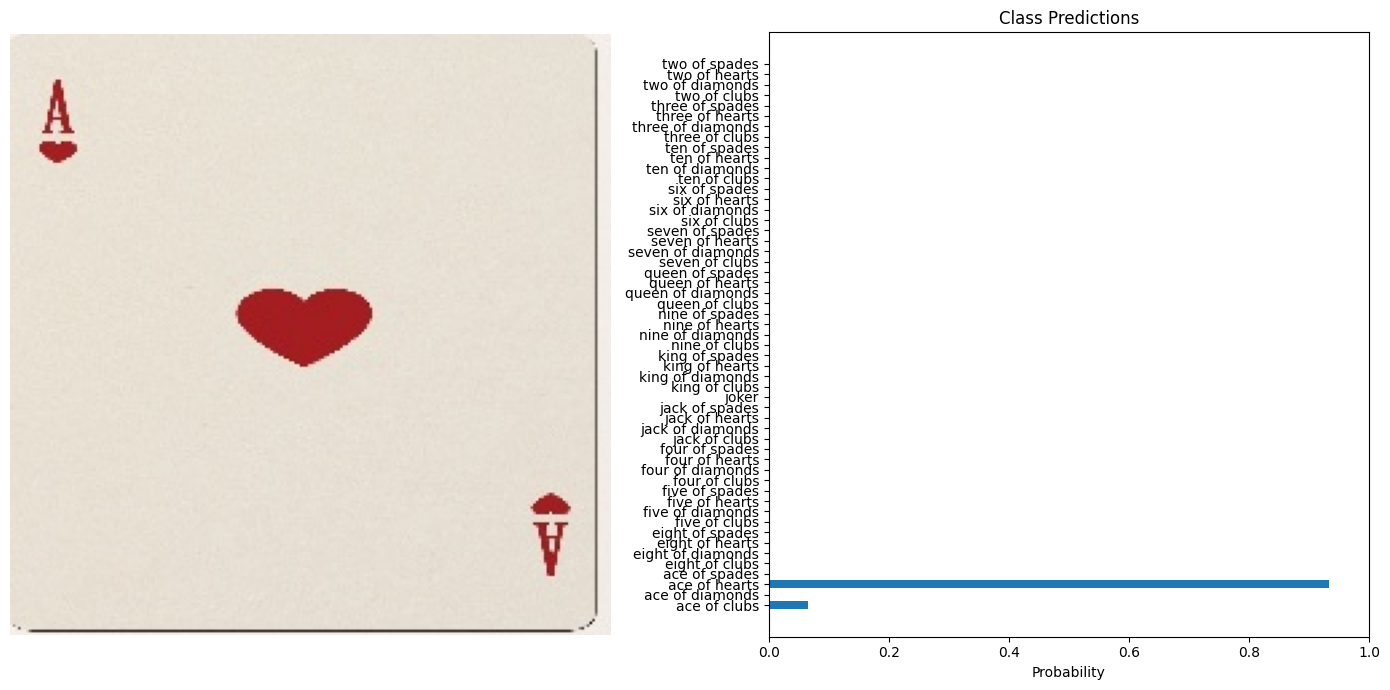

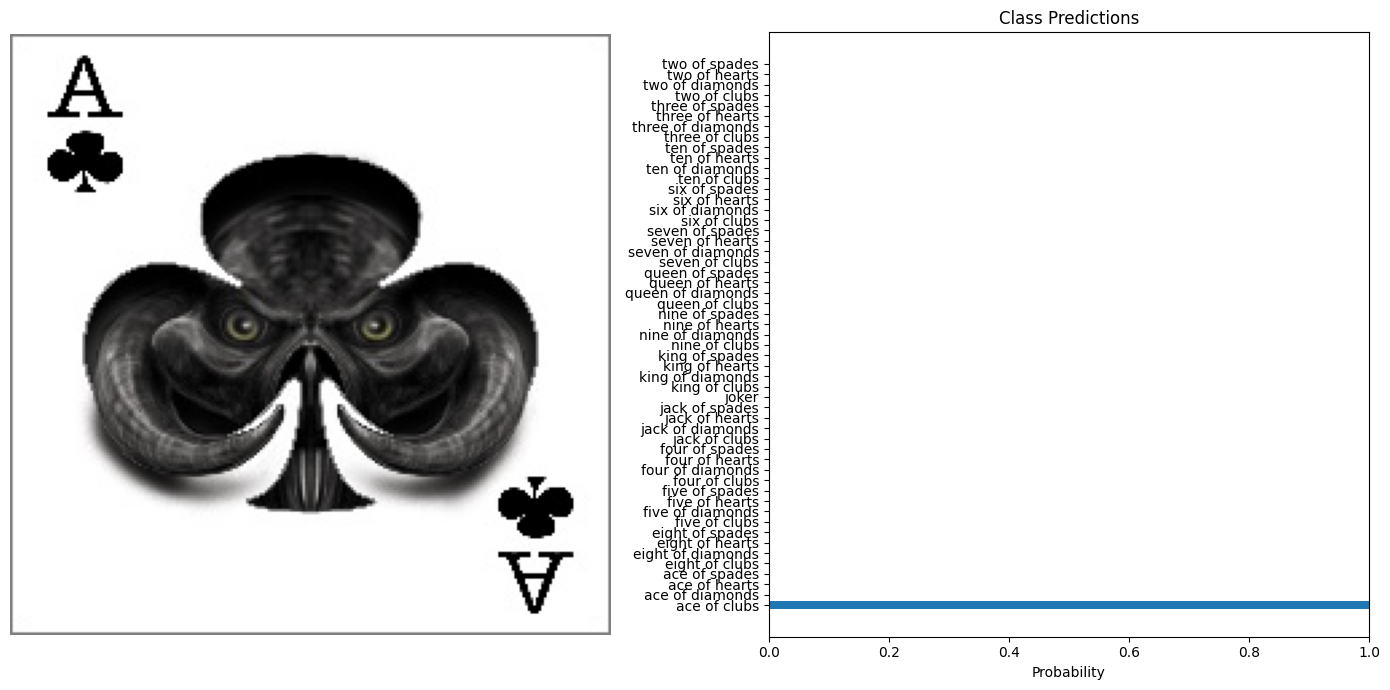

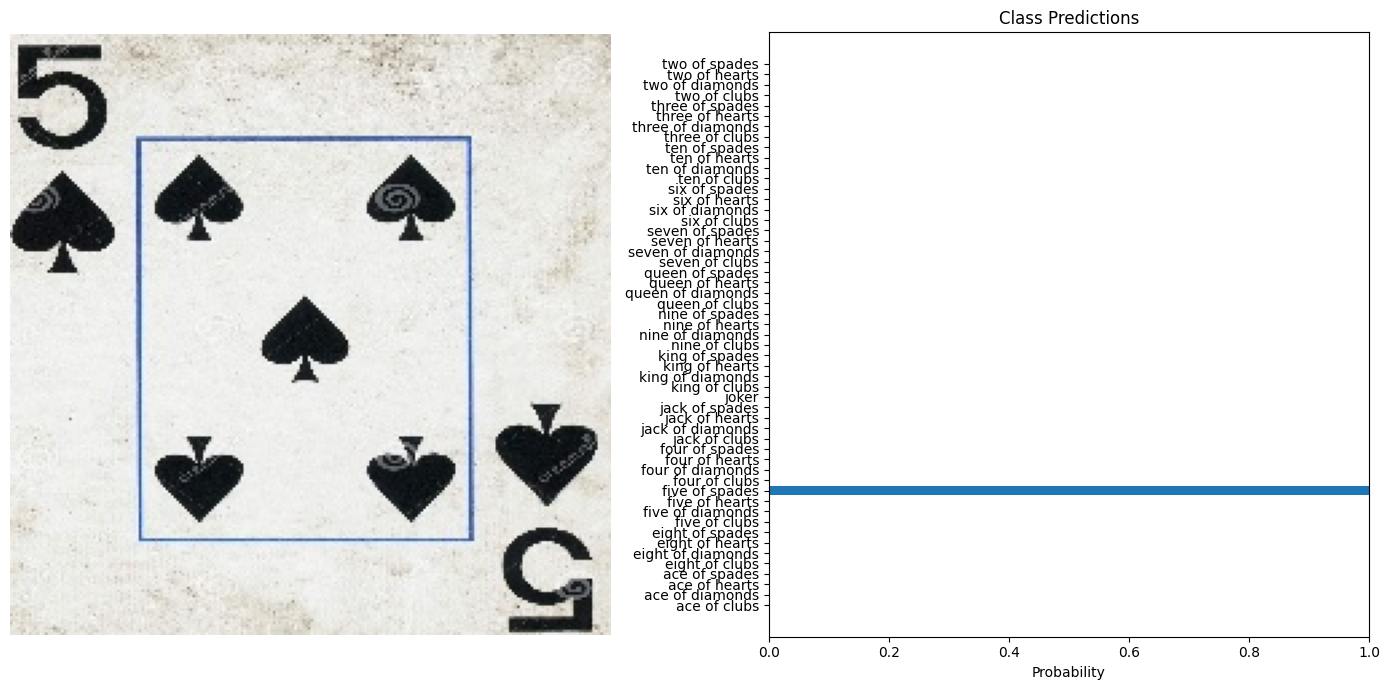

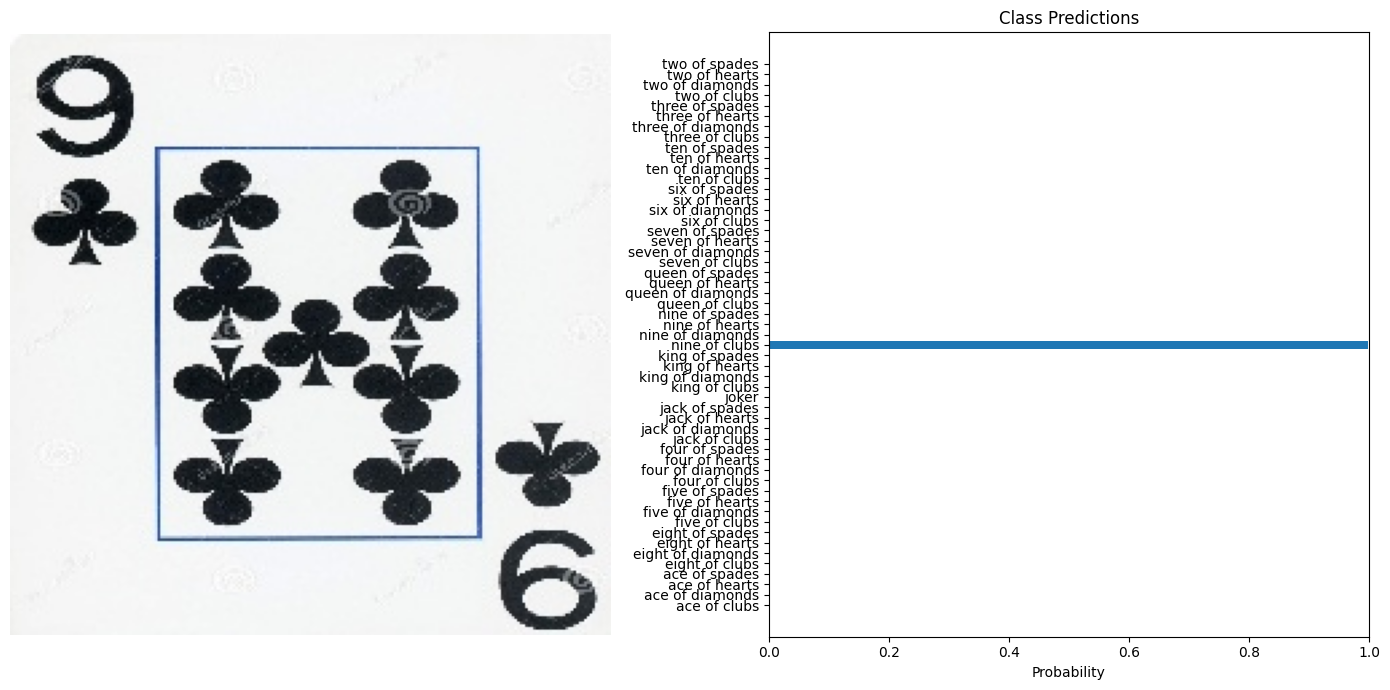

In [32]:
from glob import glob
test_images = glob(r'C:\Users\meretricis\Desktop\py projects\cards_dataset\test\*\*')
test_examples = np.random.choice(test_images, 10)

for example in test_examples:
    original_image, image_tensor = preprocess_image(example, transform)
    probabilities = predict(model, image_tensor, device)

    class_names = dataset.classes 
    visualize_predictions(original_image, probabilities, class_names)